# Medical Signal Segmentation and Classification

**Objectives:**

In this experiment, we will use publicly accessible MRI datasets for image segmentation tasks, including：

* edge-based segmentation, 

* unsupervised classification-based segmentation.

And use Pima Indians Diabetes Database to perform medical signal classification through support vector machines.

## I. MRI Dataset
The MRI data is stored as a 157-by-189-by-68 NumPy array. Show image of each of the frame within the dataset using the imshow() function imported from matplotlib.pyplot. Use this function to show the data in the axial view at slice 16, the data in the sagittal view at slice 64, and the data in the coronal view at slice 64. And set the aspect of the axis scaling (the ratio of y-unit to x-unit) to 0.5 when plotting the images.

(157, 189, 68)


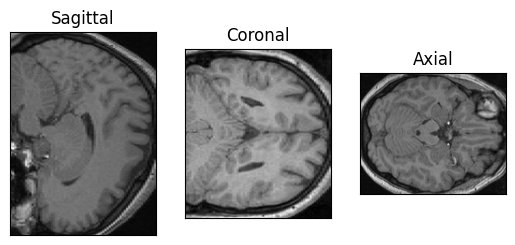

In [1]:
from skimage import io
import matplotlib.pyplot as plt

D = io.imread("attention-mri.tif")
print(D.shape)

im_x = D[63, :, :]  # sagittal(x)
im_y = D[:, 63, :]  # coronal(y)
im_z = D[:, :, 15]  # transaxial(z)

plt.subplot(1, 3, 1), plt.imshow(im_x, cmap='gray', aspect=0.5)
plt.title('Sagittal'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(im_y, cmap='gray', aspect=0.5)
plt.title('Coronal'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(im_z, cmap='gray')
plt.title('Axial'), plt.xticks([]), plt.yticks([])
plt.show()

## II. Edge Filters

Edge provides critical information about the shape of the region of interest (ROI), and serves as an important step in many segmentation algorithms. In this task, we work on the data in the axial view at slice 16 for edge detection.

(1) Calculate the image gradients along x and y directions with the function cv2.Sobel(), and the gradient magnitude using Numpy.sqrt() function, and plot image gradients ("Gx", "Gy") as well as gradient magnitude ("Gmat") using imshow() function.

(2) Define the Prewitt kernels in both x and y directions, and use the cv2.filter2D() function to complete prewitt edge filtering.

(3) Conduct a Canny edge detection with the function of feature.canny() and plot the results using imshow() function. Change the lower and upper thresholds to (2, 5) and (3, 15), respectively.

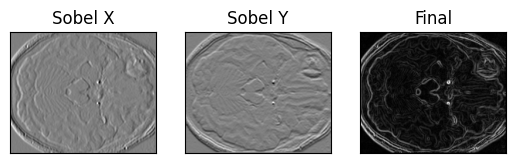

In [4]:
# (1):
import cv2
import numpy as np

Gx = cv2.Sobel(im_z, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(im_z, cv2.CV_64F, 0, 1, ksize=3)
Gmat = np.sqrt(Gx**2.0 + Gy**2.0)

plt.subplot(1, 3, 1), plt.imshow(Gx, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(Gy, cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(Gmat, cmap='gray')
plt.title('Final'), plt.xticks([]), plt.yticks([])
plt.show()

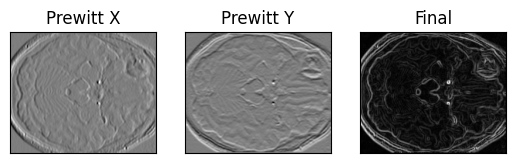

In [5]:
# (2):
kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
Gx = cv2.filter2D(im_z, -1, kernel_x)
Gy = cv2.filter2D(im_z, -1, kernel_y)
Gmat = np.sqrt(Gx**2.0 + Gy**2.0)

plt.subplot(1, 3, 1), plt.imshow(Gx, cmap='gray')
plt.title('Prewitt X'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(Gy, cmap='gray')
plt.title('Prewitt Y'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(Gmat, cmap='gray')
plt.title('Final'), plt.xticks([]), plt.yticks([])
plt.show()

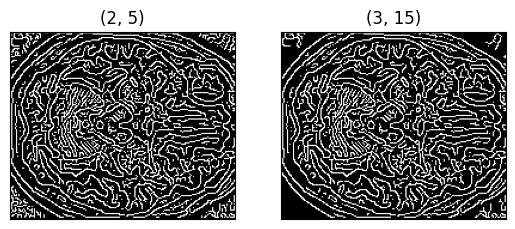

In [6]:
# (3):
from skimage import feature

ef1 = feature.canny(im_z, 1.0, 2, 5)
ef2 = feature.canny(im_z, 1.0, 3, 15)

plt.subplot(1, 2, 1), plt.imshow(ef1, cmap='gray')
plt.title('(2, 5)'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(ef2, cmap='gray')
plt.title('(3, 15)'), plt.xticks([]), plt.yticks([])
plt.show()

## III. Kmeans clustering
Kmeans clustering is an unsupervised method for grouping similar pixels in an image, which could contribute to segmentation algorithms. In this task, we work on the data in the axial view at slice 16 for kmeans clustering.

(1) Import KMeans from the sklearn.cluster package.

(2) Group the pixels in slice 16 using the function of KMeans(). Show the results with 4, 8, 20 clusters, respectively. To show the results, replace the intensity value at each pixel with the intensity value of its corresponding cluster centres and display the resulting image use the function imshow(). This will give each cluster a unique color.

(3) If 4 clusters are to be generated, plot the relationship between within-cluster sums of point-to-centroid distances (kmeans.inertia_) and number of iterations (kmeans.n_iter_). The x-axis corresponds to the number of iterations and the y-axis corresponds to the within-cluster sums.

In [7]:
#(1):
from sklearn.cluster import KMeans

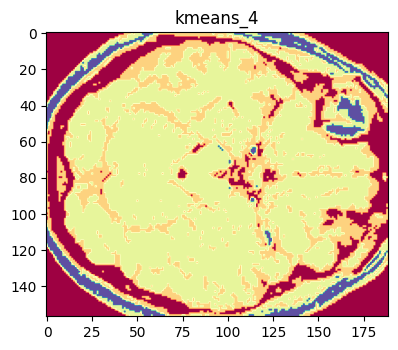

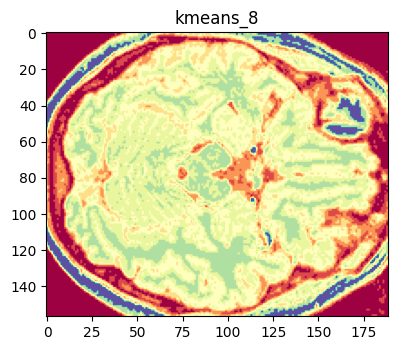

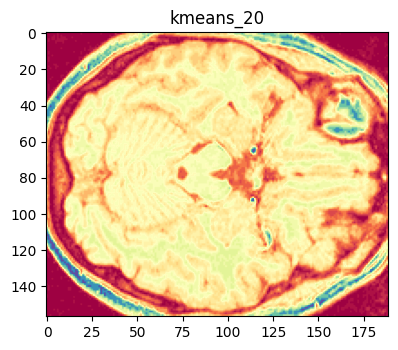

In [8]:
#(2):
count = 1
X = im_z.reshape((-1, 1))

estimators = [
    ('kmeans_4', KMeans(n_clusters=4, n_init='auto')), 
    ('kmeans_8', KMeans(n_clusters=8, n_init='auto')), 
    ('kmeans_20', KMeans(n_clusters=20, n_init='auto'))
]

for name, est in estimators:   
    kmeans = est.fit(X)
    labels = kmeans.labels_
    choices = kmeans.cluster_centers_.squeeze()
    img = np.choose(labels, choices)
    img.shape = im_z.shape
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 3, count), plt.imshow(img, plt.cm.Spectral)
    plt.title(name)  
    count += 1
    plt.show()

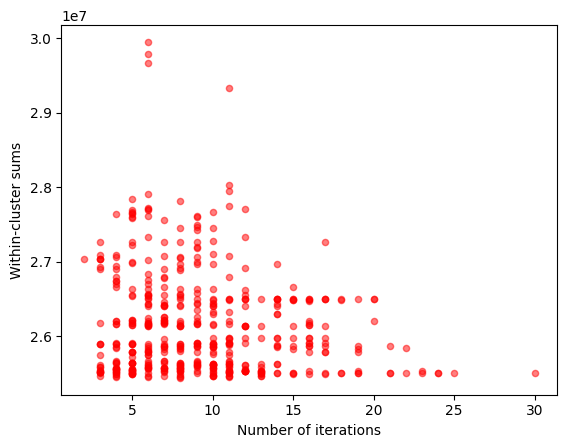

In [9]:
#(3):
trytime = 500
x_list = []
y_list = []

for i in range(trytime):
    kmeans = KMeans(n_clusters=4, n_init='auto').fit(im_z)
    x_list.append(kmeans.n_iter_)
    y_list.append(kmeans.inertia_)

ax = plt.gca()
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Within-cluster sums')
ax.scatter(x_list, y_list, c='r', s=20, alpha=0.5)
plt.show()

## IV. Support Vector Machine

Support-vector machines (SVMs) are supervised learning machine learning models widely used for classification and regression tasks. In medical research, SVMs can be used to predict the health status of a patient for a target disease. In this experiment, we are going to train a SVM model to predict Diabetes.

Run the following code to load the datasets.

**Step 1: Import APIs and Load the PIMA dataset**

In [ ]:
from datasets import load_dataset

# Load data
dataset = load_dataset("george-chou/Pima", split="train")

# Preprocess data
x_data, y_data = [], []

for item in dataset:
    item_vals = list(item.values())
    x_data.append(item_vals[1:-2])
    y_data.append(item_vals[-1])

**Step 2: Split the dataset into training and testing**

In [5]:
# Split dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=73)

**Step 3: Traning a SVM model and output accuracy**

In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC(loss='hinge', random_state=42, max_iter=700000).fit(x_train, y_train)
print(clf.score(x_test, y_test))